# Salary Project

Problem Statement:
    
Predict the salary if the employee using the features provided in the data.

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
import warnings
warnings.filterwarnings('ignore')

In [91]:
df=pd.read_csv('Salaries.csv')

In [92]:
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


In [93]:
#checking the type of file
type(df)

pandas.core.frame.DataFrame

In [94]:
#checking the columns present
df.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')

In [95]:
df.all()

rank              True
discipline        True
yrs.since.phd     True
yrs.service      False
sex               True
salary            True
dtype: bool

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rank           397 non-null    object
 1   discipline     397 non-null    object
 2   yrs.since.phd  397 non-null    int64 
 3   yrs.service    397 non-null    int64 
 4   sex            397 non-null    object
 5   salary         397 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 18.7+ KB


The info function shows us the column names and the data types. There are 3 columns with object data type and 3 column with integer data type.

In [97]:
df.head(10)

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
5,AssocProf,B,6,6,Male,97000
6,Prof,B,30,23,Male,175000
7,Prof,B,45,45,Male,147765
8,Prof,B,21,20,Male,119250
9,Prof,B,18,18,Female,129000


In [98]:
df.shape

(397, 6)

Dataframe has 397 rows and 6 columns.

In [99]:
df.dtypes

rank             object
discipline       object
yrs.since.phd     int64
yrs.service       int64
sex              object
salary            int64
dtype: object

In [100]:
df.isnull().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

Dataset has no missing values.

In [101]:
df.describe()

,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000
mean,22.314861,17.614610,113706.458438
std,12.887003,13.006024,30289.038695
min,1.000000,0.000000,57800.000000
25%,12.000000,7.000000,91000.000000
50%,21.000000,16.000000,107300.000000
75%,32.000000,27.000000,134185.000000
max,56.000000,60.000000,231545.000000


Since count of each value is 397, therefore no missing values. Data is symmetrically or normally distributed since mean and median are close to each other in all the columns.There seems to be very few or no outliers present because not much difference in the interquartile ranges.

In [102]:
numeric_features=['rank','discipline', 'yrs.since.phd', 'yrs.service',
       'sex', 'salary']
print(len(numeric_features))

6


# Visualization of the dataset

Univariate Analysis

In [103]:
df['discipline'].unique()

array(['B', 'A'], dtype=object)

Text(0.5, 1.0, 'discipline')

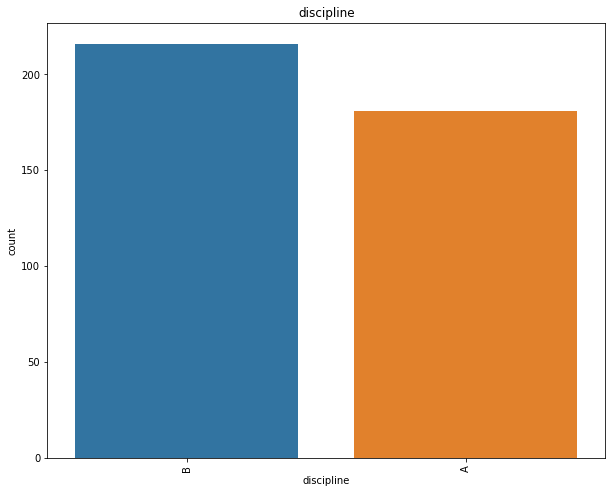

In [104]:
plt.figure(figsize=(10,8))
sns.countplot(df['discipline'])
plt.xticks(rotation = 90)
plt.title('discipline')

In [105]:
df['rank'].unique()

array(['Prof', 'AsstProf', 'AssocProf'], dtype=object)

Text(0.5, 1.0, 'rank')

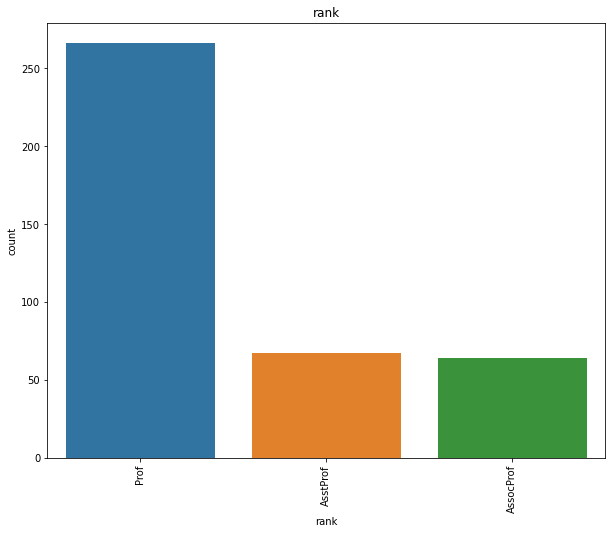

In [106]:
plt.figure(figsize=(10,8))
sns.countplot(df['rank'])
plt.xticks(rotation = 90)
plt.title('rank')

In [107]:
df['sex'].unique()

array(['Male', 'Female'], dtype=object)

Text(0.5, 1.0, 'sex')

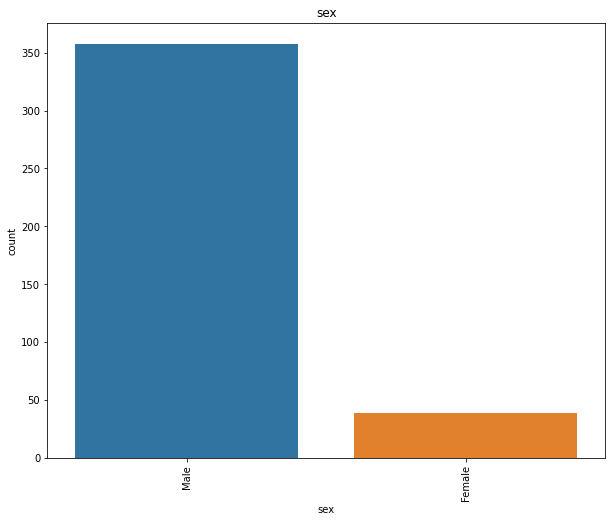

In [108]:
plt.figure(figsize=(10,8))
sns.countplot(df['sex'])
plt.xticks(rotation = 90)
plt.title('sex')

Bivariate Analysis

<AxesSubplot:xlabel='rank', ylabel='salary'>

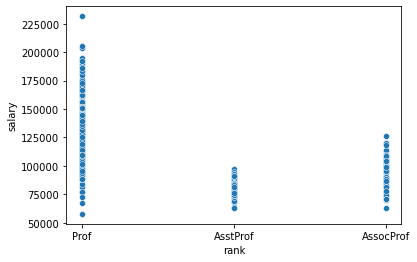

In [109]:
sns.scatterplot(x='rank',y='salary',data=df)

From the above plot we can observe that, rank of professor has highest salary, afterthat Associate professor then Assistant professor has lowest salary amongs this three rank.

<AxesSubplot:xlabel='discipline', ylabel='salary'>

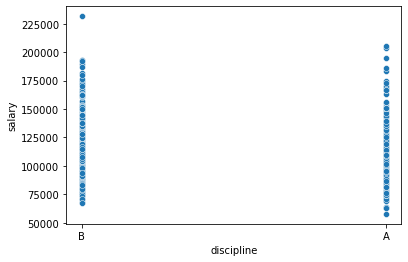

In [110]:
sns.scatterplot(x='discipline',y='salary',data=df)

From the plot it is clear that discipline A has higher salary than discipline B. And some outliers are also there.

<AxesSubplot:xlabel='yrs.since.phd', ylabel='salary'>

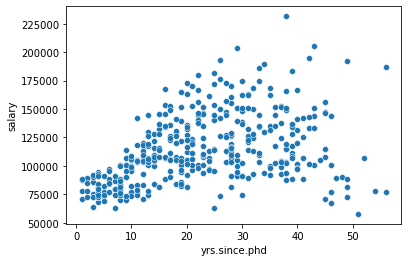

In [111]:
sns.scatterplot(x='yrs.since.phd',y='salary',data=df)

From the plot we can observe that , for yrs.since.phd from 0 to 30 it is positive correlated (increased) but after 30 to 50 it is negative correlated(decreased) with salary. Some outliers are also present.

Multivariate Analysis

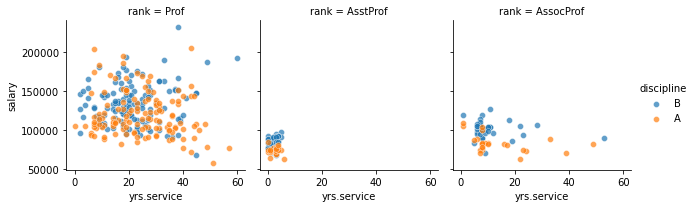

In [112]:
g = sns.FacetGrid(df, col="rank", hue="discipline")
g.map(sns.scatterplot, "yrs.service", "salary", alpha=.7)
g.add_legend()

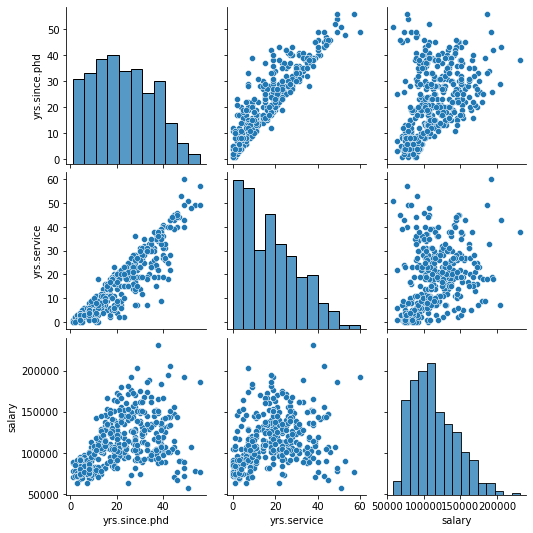

In [113]:
sns.pairplot(df)

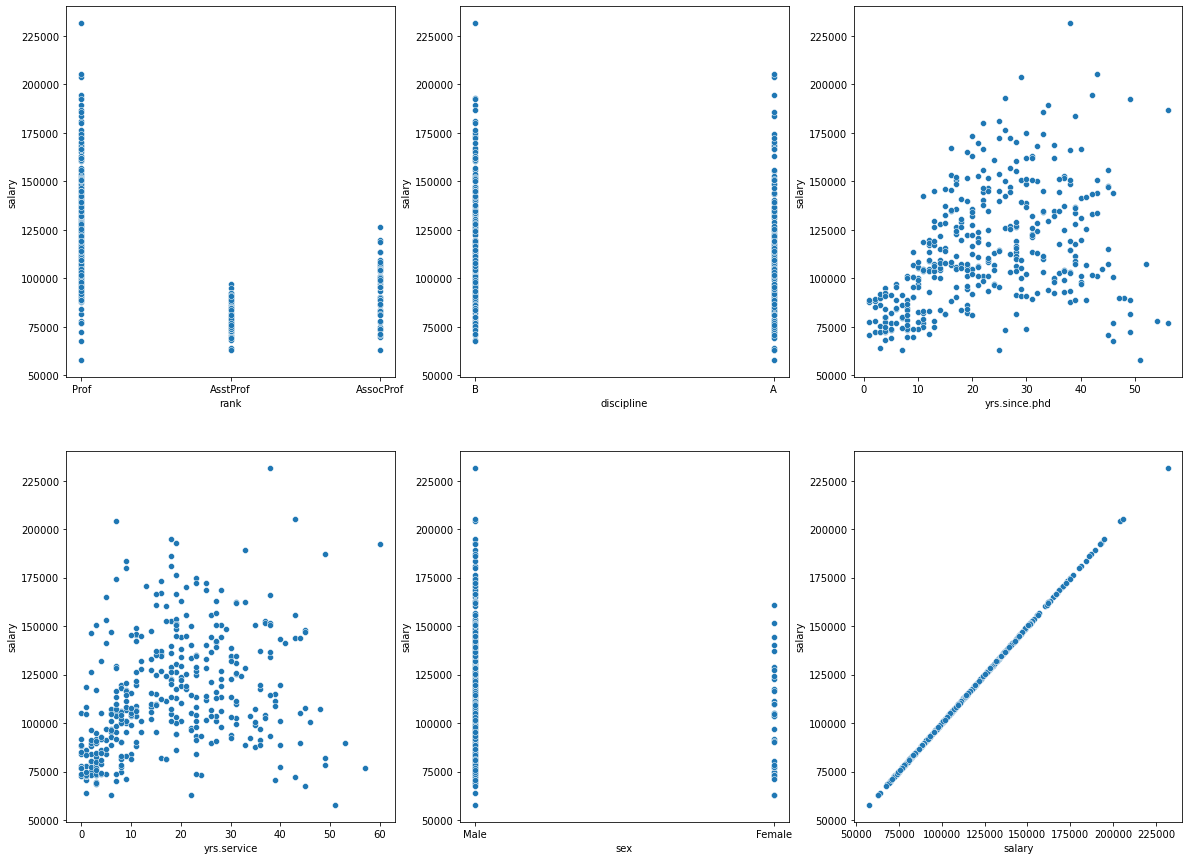

In [114]:
plt.figure(figsize=(20,15))
plotnumber = 1

for column in df:
    if plotnumber <= 6:
        ax=plt.subplot(2,3,plotnumber)
        sns.scatterplot(df[column],y=df['salary'])
    plotnumber = plotnumber+1

plt.show()

In [115]:
df.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')

In [116]:
df['discipline']=df['discipline'].replace({'A':0,'B':1})

In [117]:
df.dtypes['discipline']  # So here we converted data type of 'discipline' from object to integer using replace method.

dtype('int64')

In [118]:
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,1,19,18,Male,139750
1,Prof,1,20,16,Male,173200
2,AsstProf,1,4,3,Male,79750
3,Prof,1,45,39,Male,115000
4,Prof,1,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,0,33,30,Male,103106
393,Prof,0,31,19,Male,150564
394,Prof,0,42,25,Male,101738
395,Prof,0,25,15,Male,95329


# Correlation

In [119]:
corr=df.corr()

<AxesSubplot:>

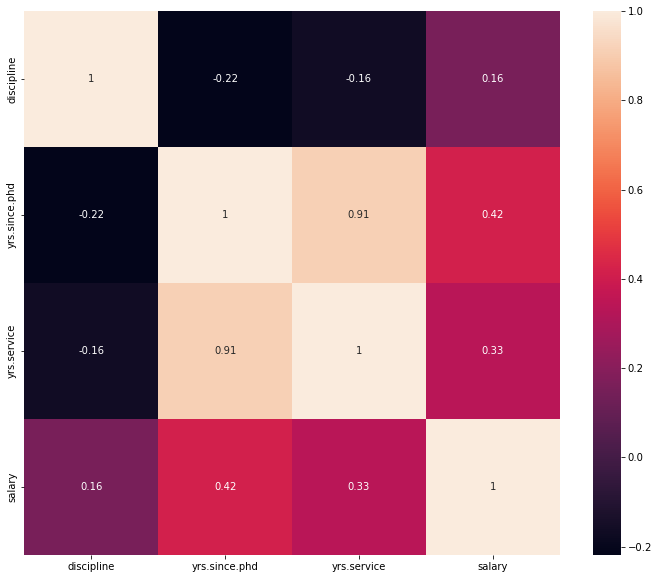

In [120]:
plt.figure(figsize=(12,10))
sns.heatmap(corr,annot=True,annot_kws={'size':10})

Obervations:
1. yrs.since.phd and yrs.service are highly correlated(91%).
2. yrs.service and salary are good correlated i.e. 33% but some outliers are present.
3. yrs.since.phd and salary are also good correlated (42%) but many outliers are present.
4. Discipline and salary are negative correlated (only 16%), its not a good correlation.

# Data Cleaning

In [121]:
df=df.drop(columns=['rank','sex'],axis=1)

In [122]:
df

,discipline,yrs.since.phd,yrs.service,salary
0,1,19,18,139750
1,1,20,16,173200
2,1,4,3,79750
3,1,45,39,115000
4,1,40,41,141500
...,...,...,...,...
392,0,33,30,103106
393,0,31,19,150564
394,0,42,25,101738
395,0,25,15,95329


# Normal Distribution curve

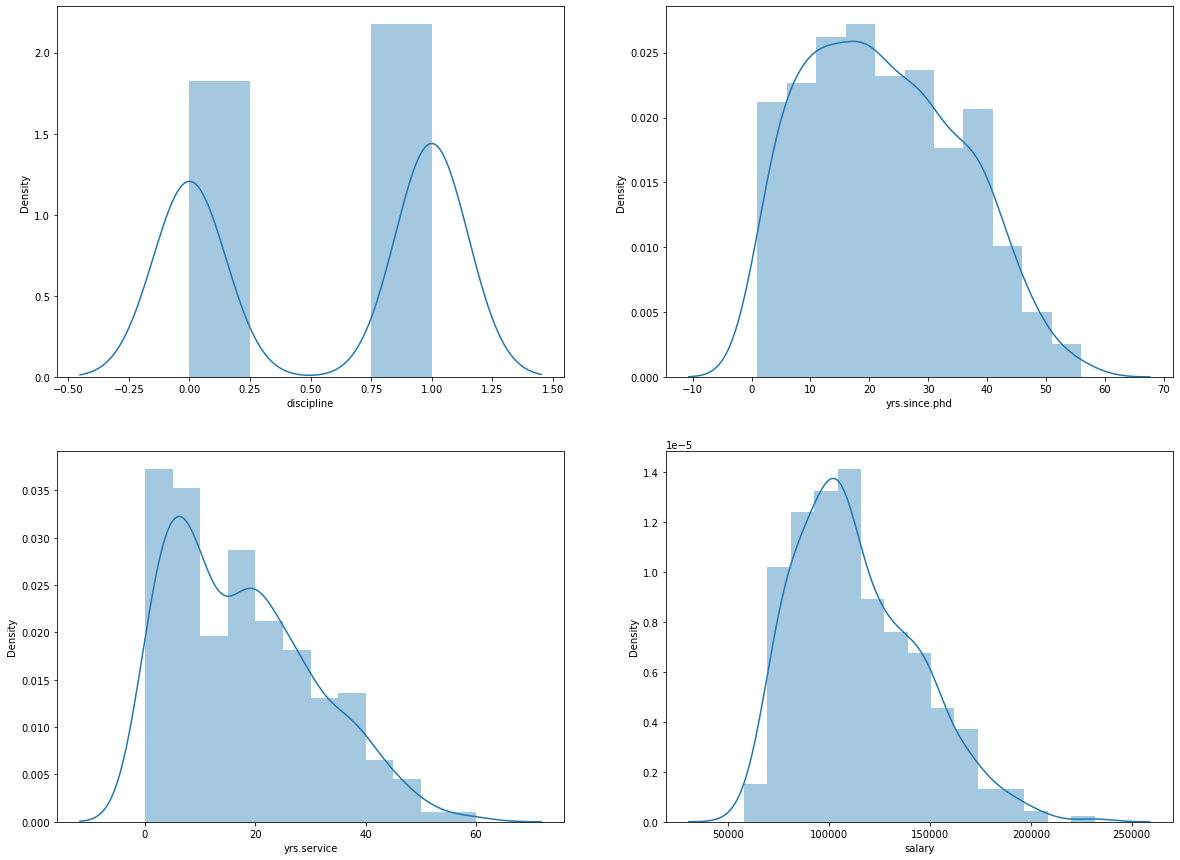

In [123]:
plt.figure(figsize=(20,15))
plotnumber = 1

for column in df:
    if plotnumber <= 4:
        ax=plt.subplot(2,2,plotnumber)
        sns.distplot(df[column])
    plotnumber = plotnumber+1

plt.show()

Above plot shows that some features are normally distributed. (some outliers are there)

# Outliers checking

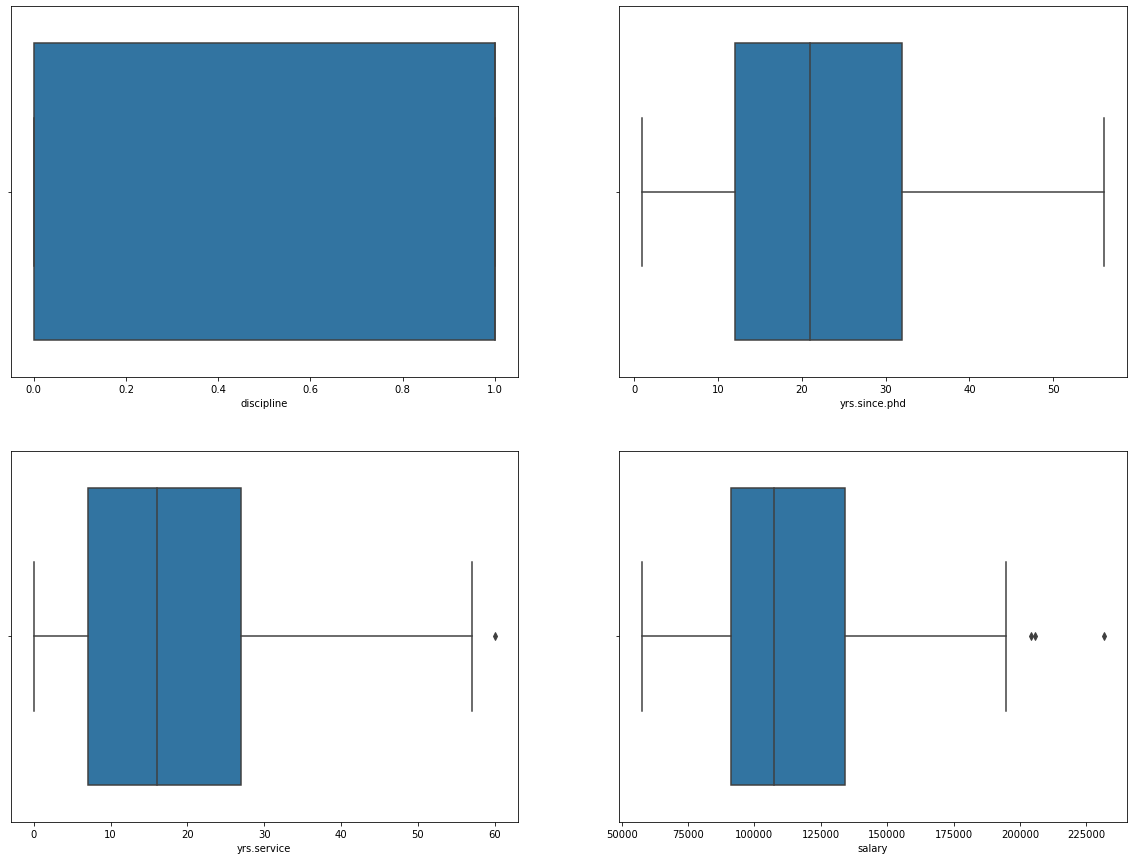

In [124]:
plt.figure(figsize=(20,15))
plotnumber = 1

for column in df:
    if plotnumber <= 4:
        ax=plt.subplot(2,2,plotnumber)
        sns.boxplot(df[column])
    plotnumber = plotnumber+1

plt.show()

From above box plot it is clear that very few outliers present in salary column.

# Skewness

In [125]:
df.skew()

discipline      -0.177684
yrs.since.phd    0.300880
yrs.service      0.650569
salary           0.714568
dtype: float64

# Removing outliers

z-score Techniques

In [126]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z.shape

(397, 4)

In [127]:
threshold=3
print(np.where(z>3))

(array([ 43, 131, 330, 364], dtype=int64), array([3, 2, 2, 3], dtype=int64))


In [128]:
df=df[(z<3).all(axis=1)]
print(df.shape)

(393, 4)


In [129]:
#percentage of data loss
loss_percent=(397-393)/397*100
print(loss_percent)

1.0075566750629723


So here we lost only 1% of data which is quit good.

# Splitting the dataset

In [130]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [131]:
x=df.drop('salary',axis=1)
y=df.salary

In [132]:
x

,discipline,yrs.since.phd,yrs.service
0,1,19,18
1,1,20,16
2,1,4,3
3,1,45,39
4,1,40,41
...,...,...,...
392,0,33,30
393,0,31,19
394,0,42,25
395,0,25,15


In [133]:
y

0      139750
1      173200
2       79750
3      115000
4      141500
        ...  
392    103106
393    150564
394    101738
395     95329
396     81035
Name: salary, Length: 393, dtype: int64

# Scaling

In [134]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [135]:
X_scaled # Displayed the feature values after applying StandardScaler.

,discipline,yrs.since.phd,yrs.service
0,0.914576,-0.241947,0.056278
1,0.914576,-0.163103,-0.102269
2,0.914576,-1.424597,-1.132824
3,0.914576,1.807980,1.721021
4,0.914576,1.413764,1.879568
...,...,...,...
388,-1.093403,0.861860,1.007560
389,-1.093403,0.704173,0.135552
390,-1.093403,1.571450,0.611193
391,-1.093403,0.231113,-0.181542


By using StandardScaler we scaled the Indepenent variables(x)

# Training and Testing data sets

In [136]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=41)

# Machine Learning Model

In [137]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor


# Model Selection

linear_model = LinearRegression()
svr_model = SVR(C=1.0, epsilon=0.2, kernel='poly', gamma='auto')

rfr_model = RandomForestRegressor(max_depth=2, max_features="sqrt")
knr_model = KNeighborsRegressor(n_neighbors=2, algorithm='kd_tree')

In [138]:
# Training the models

linear_model.fit(x_train, y_train)
svr_model.fit(x_train, y_train)

rfr_model.fit(x_train, y_train)
knr_model.fit(x_train, y_train)

KNeighborsRegressor(algorithm='kd_tree', n_neighbors=2)

In [139]:
# Predictions

pred_linear = linear_model.predict(x_test)
pred_svr = svr_model.predict(x_test)

pred_rfr = rfr_model.predict(x_test)
pred_knr = knr_model.predict(x_test)

# Evaluation metrics

In [140]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV

In [141]:
# RMSE - a lower RMSE is better than a higher one

mse_linear = mean_squared_error(y_test, pred_linear)
mse_svr = mean_squared_error(y_test, pred_svr)

mse_rfr = mean_squared_error(y_test, pred_rfr)
mse_knr = mean_squared_error(y_test, pred_knr)

rmse_linear = sqrt(mse_linear)
rmse_svr = sqrt(mse_svr)

rmse_rfr = sqrt(mse_rfr)
rmse_knr = sqrt(mse_knr)

print(f"RMSE of Linear Regression is: ", rmse_linear)
print(f"RMSE of Support Vector Regression is: ", rmse_svr)

print(f"RMSE of Random Forest Regressor is: ", rmse_rfr)
print(f"RMSE of K Neighbors Regressor is: ", rmse_knr)

RMSE of Linear Regression is:  23643.1917193556
RMSE of Support Vector Regression is:  23663.615607892065
RMSE of Random Forest Regressor is:  20619.265163087595
RMSE of K Neighbors Regressor is:  27293.818776585493


In [142]:
# R2 Score for the models

print(f"R2 Score for Linear Regression is: ", r2_score(y_test, pred_linear, multioutput='variance_weighted')*100)
print(f"R2 Score for Support Vector Regression is: ", r2_score(y_test, pred_svr, multioutput='variance_weighted')*100)

print(f"R2 Score for Random Forest Regressor is: ", r2_score(y_test, pred_rfr, multioutput='variance_weighted')*100)
print(f"R2 Score for K Neighbors Regressor is: ", r2_score(y_test, pred_knr, multioutput='variance_weighted')*100)

R2 Score for Linear Regression is:  5.1865539834379355
R2 Score for Support Vector Regression is:  5.022676308225127
R2 Score for Random Forest Regressor is:  27.888572803390776
R2 Score for K Neighbors Regressor is:  -26.35322491622083


Hence,the best model is Random Forest Regressor with accuracy score 28%.